# Задание 6

Изучить поведение FDR для эксперимента из лекции. Рассмотреть случаи, когда количество объектов m варьируется от 200 от 100000.
Калибруемые параметры: m, m0, alpha. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
%matplotlib inline

В модели эксперимента $n=20$  фиксировано

In [2]:
n = 20

Функция для подсчета FDR. Тут вместо матожидания мы используем честное усреднение, генерируя данные каждый раз заного, этим мы нивелируем неточность связанную с синтетическим порождением данных.

In [38]:
def find_everage_FDR(m=200, m_0=150, alpha=0.05, bonferonni=True, ev=10):
    if bonferonni:
        alpha /= m
    
    FDR = 0
    for i in range(ev):
        good = st.norm.rvs(loc=0, scale=1, size=(m_0, n))
        bad = st.norm.rvs(loc=1, scale=1, size=(m - m_0, n))

        false_negative = (st.ttest_1samp(good, 0, axis=1)[1] < alpha).sum()
        true_positive = m_0 - false_negative

        true_negative = (st.ttest_1samp(bad, 0, axis=1)[1] < alpha).sum()
        false_positive = m - m_0 - false_negative

        FDR += false_negative / max(1, false_negative + true_negative)
        
    return FDR / ev

find_everage_FDR()

0.0030303030303030303

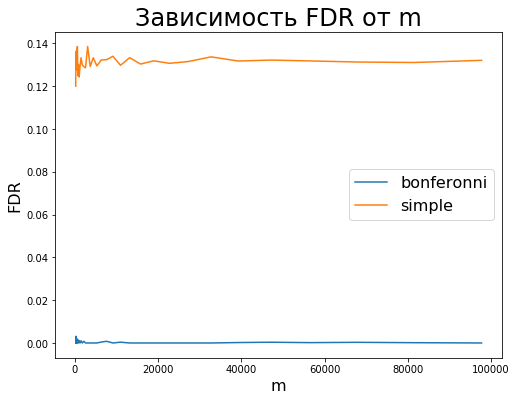

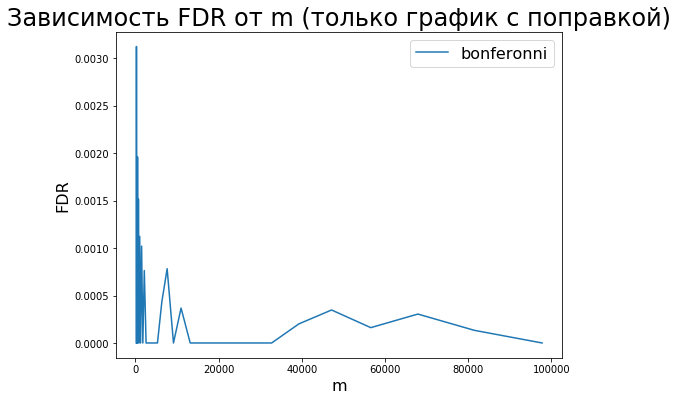

In [39]:
FDR_list = []
FDR_bonf_list = []
m_list = []
m = 200
while m < 100000:
    m_list.append(m)
    FDR_list.append(find_everage_FDR(m=m, m_0=int(m*3/4), bonferonni=False))
    FDR_bonf_list.append(find_everage_FDR(m=m, m_0=int(m*3/4)))
    m = int(m * 1.2)

plt.figure(figsize = (8, 6))
plt.title('Зависимость FDR от m', fontsize=24)
plt.plot(m_list, FDR_bonf_list, label='bonferonni')
plt.plot(m_list, FDR_list, label='simple')
plt.legend(fontsize=16)
plt.xlabel('m', fontsize=16)
plt.ylabel('FDR', fontsize=16)
plt.show()
plt.figure(figsize = (8, 6))
plt.title('Зависимость FDR от m (только график с поправкой)', fontsize=24)
plt.plot(m_list, FDR_bonf_list, label='bonferonni')
plt.legend(fontsize=16)
plt.xlabel('m', fontsize=16)
plt.ylabel('FDR', fontsize=16)
plt.show()

Тут мы видим, что FDR не зависит от m , и что FDR с применением поправки бонферонни при увеличении m находится в районе нуля

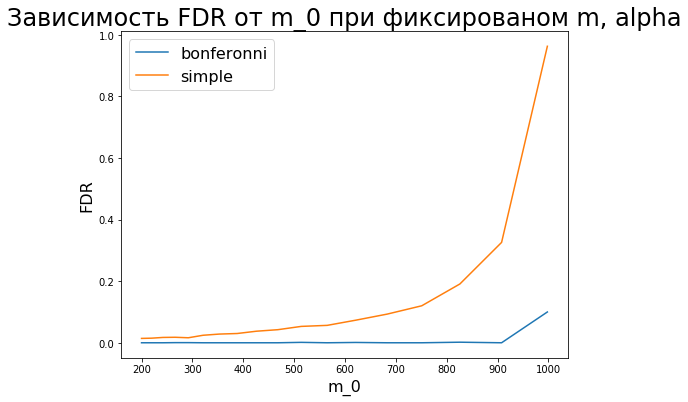

In [40]:
FDR_list = []
FDR_bonf_list = []
m_list = []
m_0 = 200
while m_0 < 1000:
    m_list.append(m_0)
    FDR_list.append(find_everage_FDR(m=1000, m_0=m_0, bonferonni=False))
    FDR_bonf_list.append(find_everage_FDR(m=1000, m_0=m_0))
    m_0 = int(m_0 * 1.1)

plt.figure(figsize = (8, 6))
plt.title('Зависимость FDR от m_0 при фиксированом m, alpha', fontsize=24)
plt.plot(m_list, FDR_bonf_list, label='bonferonni')
plt.plot(m_list, FDR_list, label='simple')
plt.legend(fontsize=16)
plt.xlabel('m_0', fontsize=16)
plt.ylabel('FDR', fontsize=16)
plt.show()

При варьировании $m_0$ FDR растет при приближении к m

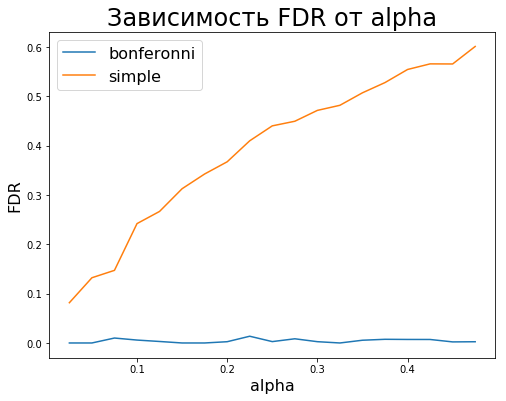

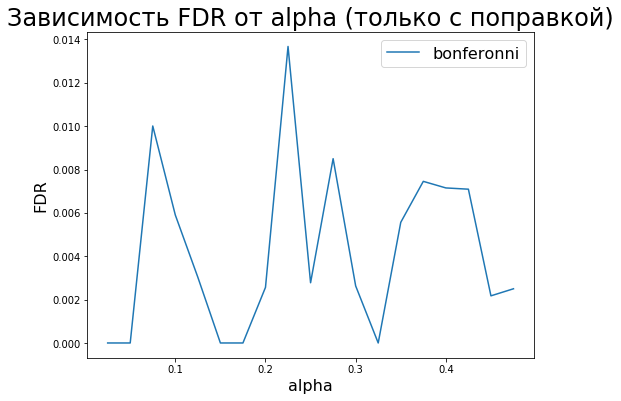

In [41]:
FDR_list = []
FDR_bonf_list = []
alpha_list = []
m = 200
for alpha in np.arange(0.025, 0.5, 0.025):
    alpha_list.append(alpha)
    FDR_list.append(find_everage_FDR(alpha=alpha, bonferonni=False))
    FDR_bonf_list.append(find_everage_FDR(alpha=alpha))

plt.figure(figsize = (8, 6))
plt.title('Зависимость FDR от alpha', fontsize=24)
plt.plot(alpha_list, FDR_bonf_list, label='bonferonni')
plt.plot(alpha_list, FDR_list, label='simple')
plt.legend(fontsize=16)
plt.xlabel('alpha', fontsize=16)
plt.ylabel('FDR', fontsize=16)
plt.show()
plt.figure(figsize = (8, 6))
plt.title('Зависимость FDR от alpha (только с поправкой)', fontsize=24)
plt.plot(alpha_list, FDR_bonf_list, label='bonferonni')
plt.legend(fontsize=16)
plt.xlabel('alpha', fontsize=16)
plt.ylabel('FDR', fontsize=16)
plt.show()

при варьировании $\alpha$ от 0 до 0.5 FDR ожидаемо, почти линейно растет,

с поправкой же бонферони он все равно флуктуирует в районе нуля